In [101]:
#Creator: Hetul Varaiya
#University: Arizona State University
#Date: 04/13/2018 - 04/14/2018
#I am an industrial Engineering Graduate student with a deep interest in data analytics and machine learning

#THE APPROACH USED INCLUDES:
#SVM - LINEAR SVC - 76%
#LOGISTIC REGRESSION - 71%
#NEAREST NEIGHBOR - 60%
#XGBOOST 
#RANDOM FOREST

In [2]:
#IMPORTING LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# PREPROCESSING 
#FILLING NA VALUES
#TRANSFORMING DATA


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing

dftr =  pd.read_csv('K:/Mckinsey hackathon/without pca/train.csv')
stro1 = dftr['stroke'] 
del dftr['stroke']
dftst = pd.read_csv('K:/Mckinsey hackathon/without pca/test.csv')
idkey = dftst['id']

del dftr['id']
del dftst['id']
dftr.isnull().any()
dftst.isnull().any()
dftr[['smoking_status']] = dftr[['smoking_status']].fillna(value='hetul')
dftst[['smoking_status']] = dftst[['smoking_status']].fillna(value='hetul')

from sklearn import preprocessing


In [4]:
#CREATED DUMMIES TO MAKE IT SINGLE-CLASS[0,1]
p = pd.get_dummies(data= dftr, columns = ['smoking_status','ever_married','Residence_type','work_type','gender'])
del p['smoking_status_hetul']

q = pd.get_dummies(data= dftst, columns = ['smoking_status','ever_married','Residence_type','work_type','gender'])
del q['smoking_status_hetul']


In [5]:
# TAKING THE MEAN BECAUSE VERY FEW VALUES OF BMI ARE NAN
p[['bmi']] = p[['bmi']].fillna(p[['bmi']].mean())
q[['bmi']] = q[['bmi']].fillna(q[['bmi']].mean())


[[1.         0.27216879 0.25018839 0.23762684 0.35889719]
 [0.27216879 1.         0.11977703 0.16021129 0.16122524]
 [0.25018839 0.11977703 1.         0.14693807 0.05767724]
 [0.23762684 0.16021129 0.14693807 1.         0.19129515]
 [0.35889719 0.16122524 0.05767724 0.19129515 1.        ]]


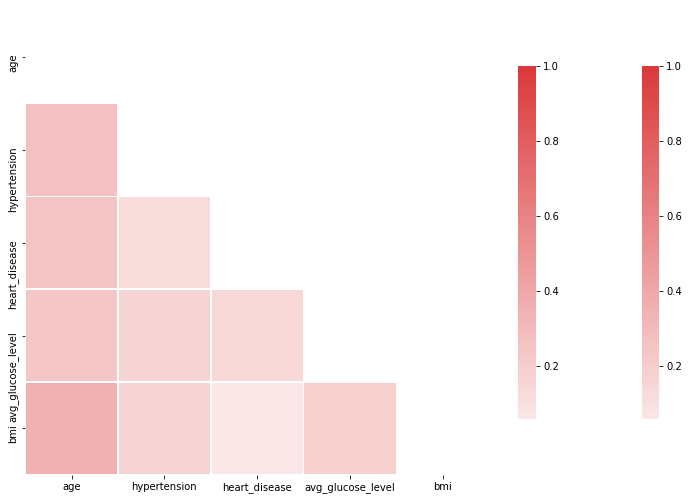

In [6]:
#FINDING CORRELATION TO GET AN OVERVIEW OF THE RELATION BETWEEN THE COLUMNS
corrp= dftr.corr()
print(np.matrix(corrp))
mask = np.zeros_like(corrp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13, 13))

cmap = sns.diverging_palette(225, 12, as_cmap=True)
sns.heatmap(corrp, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show(sns.heatmap(corrp, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}))

In [7]:
#USED STANDARDSCALER TO TRANSFORM THE DATA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(p)

scaler.mean_
p = scaler.transform(p)

scaler.fit(q)

scaler.mean_
q = scaler.transform(q)



In [102]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
p = pca.fit_transform(p)
p = pd.DataFrame(data = p)
q= pca.fit_transform(q)
q = pd.DataFrame(data = q)


In [10]:
p2 = p.copy()

In [11]:
X = p2
y = stro1

In [12]:
#splitting the data for validation

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
#FUNCTION USED FOR ROC VALUES AND CURVE PLOT
def ROC(label,result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(Y, result)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    #pl.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [62]:
#svm using L2 regularization using the training and testing data to do the validation

from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn import svm
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_circles, make_classification

linearly_separable = (X_train, y_train)
Cs = [0.001, 0.01,0.1,1]
parameters = {'C':Cs}

# svc2tr = svm.SVC(class_weight='balanced',probability = True)
# clfl2tr = GridSearchCV(svc2tr, parameters,return_train_score=True)
# clfl2tr.fit(X_train, y_train)
# # y_predsvml2tr = clfl2tr.predict(X_test)
# #print(y_predsvml2)  

# # y_score = clfl2.predict_proba(X_test)[:,1]

# # ROC(y_test,y_score)
# probl2tr = clfl2tr.predict_proba(X_test)
# y_scorel2tr = clfl2tr.predict_proba(X_test)[:,1]


In [98]:
from sklearn.svm import LinearSVC 
from sklearn.calibration import CalibratedClassifierCV
svml2tr = LinearSVC(class_weight='balanced')
clfl2tr = CalibratedClassifierCV(svml2tr) 
clfl2tr.fit(X_train, y_train)
probl2tr = clfl2tr.predict_proba(X_test)
y_scorel2tr = clfl2tr.predict_proba(X_test)[:,1]


In [16]:
# from sklearn.metrics import roc_curve
# roc = roc_curve(y_predsvml2, y_test)
# print(roc)

In [17]:
# from sklearn.cross_validation import cross_val_score
# cross_val_score(svc2tr, X_train, y_train, scoring = 'roc_auc')

Area under the ROC curve : 0.790681


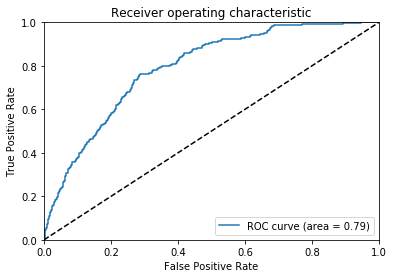

In [99]:
#ROC and AUC measure using the ROC function

ROC(y_test,y_scorel2tr)

In [100]:
#svm using L2 regularization for the actual data
# SVC seems to give the best output out of all the models tried after tuning the parameters
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn import svm
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
# from sklearn import preprocessing
# from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_circles, make_classification

# n_samples=300
# linearly_separable = (X, y)
# Cs = [0.001, 0.01,0.1,1]
# parameters = {'C':Cs}

from sklearn.svm import LinearSVC 
from sklearn.calibration import CalibratedClassifierCV
svml2 = LinearSVC(class_weight='balanced')
clfl2 = CalibratedClassifierCV(svml2) 
clfl2.fit(X, y)
y_scorel2tr = clf.predict_proba(q)[:,1]
# svc2 = svm.LinearSVC(penalty = 'l2',class_weight='balanced')
# clfl2 = GridSearchCV(svc2, parameters,return_train_score=True)
# clfl2.fit(X, y)
# probl2 = clfl2.predict_proba(q)
# y_scorel2 = clfl2.predict_proba(q)[:,1]
# print(y_scorel2)   

#np.savetxt('K:/svml2.txt',y_scorel2, delimiter="\t")


# # print('best parameters for l2:',clfl2.best_params_,',testing accuracy for l2:',clfl2.best_estimator_.score(y_pred,y_test))
# # from sklearn.metrics import classification_report
# # print(classification_report(y_test,y_pred))
# # cm = confusion_matrix(y_test, y_pred)
# # p = plot_confusion_matrix(cm,[0,1],normalize=True)

In [97]:
np.savetxt('K:/svml2.txt',y_scorel2tr, delimiter="\t")


In [40]:
#logistic regression using the training and testing data to do the validation

import sklearn.linear_model as skl_lm
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

clflrtr = skl_lm.LogisticRegression(class_weight='balanced',solver = 'lbfgs')
clflrtr.fit(X_train,y_train)
# prob = clflr.predict_proba(q)
y_scorelrtr = clflrtr.predict_proba(X_test)[:,1]

# y_predlrtr = clflrtr.predict(X_test)
# print(y_predlrtr)

#np.savetxt('K:/logistic regression.txt',np.c_[idkey,y_predlr], delimiter="\t")
# np.savetxt('myfile.txt', np.c_[x,y,z])



Area under the ROC curve : 0.791473


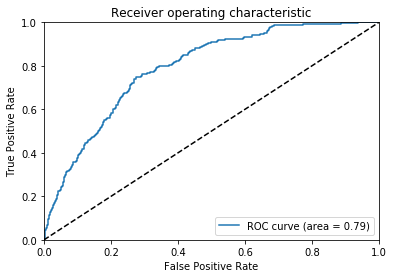

In [42]:
#ROC and AUC measure using the ROC function

ROC(y_test,y_scorelrtr)

In [43]:
#logistic regression for the actual data

import sklearn.linear_model as skl_lm
from sklearn.metrics import average_precision_score
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

clflr = skl_lm.LogisticRegression(class_weight='balanced',solver = 'lbfgs')
clflr.fit(X,y)
# prob = clflr.predict_proba(q)
# y_predlr = clflr.predict(q)
# print(y_predlr)
problr = clflr.predict_proba(q)
y_scorelr = clflr.predict_proba(q)[:,1]

#np.savetxt('K:/logistic regression.txt',y_scorelr, delimiter="\t")
# np.savetxt('myfile.txt', np.c_[x,y,z])


In [84]:
#Random forest using the training and testing data to do the validation


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
# from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc

depthsi = [1,2,4,8,16,32,64]
ntrees = [1,2,4,8,16,32,64]
max_features = [0.1,0.2,0.3,0.5,0.9]

parameters = {'max_depth':depthsi, 'n_estimators':ntrees, 'max_features':max_features}

rfctr = RandomForestClassifier(class_weight='balanced',max_depth=depthsi,n_estimators = ntrees, max_features = max_features )
clfrftr = GridSearchCV(rfctr, parameters,return_train_score=True)
clfrftr.fit(X_train, y_train)
print('best parameters:',clfrftr.best_params_)





best parameters: {'max_depth': 32, 'max_features': 0.5, 'n_estimators': 64}


Area under the ROC curve : 0.631577


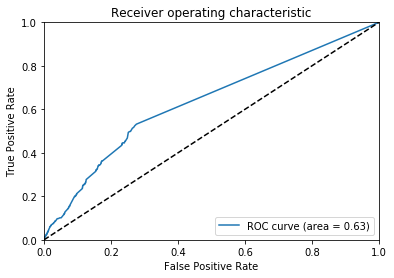

In [85]:
y_scorerftr = clfrftr.predict_proba(X_test)[:,1]
#print(y_predrf)

#ROC and AUC measure using the ROC function

ROC(y_test,y_scorerftr)

In [86]:
#Random forest for the actual data

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
# from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc

depthsi = [1,2,4,8,16,32,64]
ntrees = [1,2,4,8,16,32,64]
max_features = [0.1,0.2,0.3,0.5,0.9]

parameters = {'max_depth':depthsi, 'n_estimators':ntrees, 'max_features':max_features}

rfc = RandomForestClassifier(class_weight='balanced',max_depth=depthsi,n_estimators = ntrees, max_features = max_features )
clfrf = GridSearchCV(rfc, parameters,return_train_score=True)
clfrf.fit(X, y)
print('best parameters:',clfrf.best_params_)



KeyboardInterrupt: 

In [218]:
# y_predrf = (clfrf.predict_proba(X_test)>0.5)[:,1]
y_scorerf = clfrf.predict_proba(q)[:,1]
# print(y_predrf)

np.savetxt('K:/Mckinsey hackathon/random forest.txt',y_scorerf, delimiter="\t")


[0 0 0 ... 0 0 0]


best parameters: {'max_depth': 1, 'max_features': 0.1, 'n_estimators': 1}
Area under the ROC curve : 0.500000


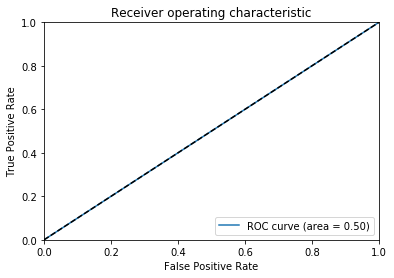

In [28]:
#xgboost using the training and testing data to do the validation
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
depthsi = [1,2,4,8,16]
ntrees = [1,2,4,8,16]
max_features = [0.1,0.2,0.3,0.5,0.9]

parameters = {'max_depth':depthsi, 'n_estimators':ntrees, 'max_features':max_features}
gbttr = XGBClassifier(max_depth=depthsi,n_estimators = ntrees, max_features = max_features,class_weight='balanced' )
clfxgbtr = GridSearchCV(gbttr, parameters,return_train_score=True)
clfxgbtr.fit(X, y)
print('best parameters:',clfxgbtr.best_params_)
# y_score = clf.predict_proba(q)[:,1]

# y_pred = (clf.predict_proba(q)>0.5)[:,1]
y_predxgbtr = clfxgbtr.predict(X_test)
ROC(y_test,y_predxgbtr)


# np.savetxt('K:/Mckinsey hackathon/xgboost.txt',y_predxgb, delimiter="\t")


In [29]:
#xgboost for the actual data

import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
depthsi = [1,2,4,8,16]
ntrees = [1,2,4,8,16]
max_features = [0.1,0.2,0.3,0.5,0.9]

parameters = {'max_depth':depthsi, 'n_estimators':ntrees, 'max_features':max_features}
gbt = XGBClassifier(max_depth=depthsi,n_estimators = ntrees, max_features = max_features,class_weight='balanced' )
clfxgb = GridSearchCV(gbt, parameters,return_train_score=True)
clfxgb.fit(X, y)
print('best parameters:',clfxgb.best_params_)
# y_score = clf.predict_proba(q)[:,1]

# y_pred = (clf.predict_proba(q)>0.5)[:,1]
# ROC(y_test,y_score)
y_predxgb = clfxgb.predict(q)

np.savetxt('K:/Mckinsey hackathon/xgboost.txt',y_predxgb, delimiter="\t")


best parameters: {'max_depth': 1, 'max_features': 0.1, 'n_estimators': 1}


In [206]:
# print(y_predxgb)

Area under the ROC curve : 0.606045


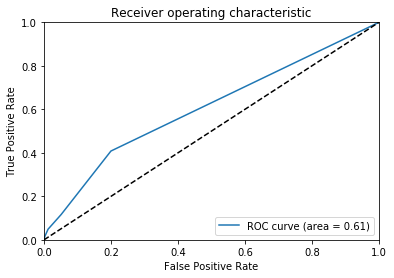

In [92]:
from sklearn import neighbors
n_neighbors = 15
clfnn = neighbors.KNeighborsClassifier(n_neighbors)
clfnn.fit(X_train, y_train)

y_scorenntr = clfnn.predict_proba(X_test)[:,1]

ROC(y_test,y_scorenntr)



In [94]:
from sklearn import neighbors
n_neighbors = 15
clfnnad = neighbors.KNeighborsClassifier(n_neighbors)
clfnnad.fit(X, y)

y_scorenn = clfnnad.predict_proba(q)[:,1]




In [95]:
# np.savetxt('K:/Mckinsey hackathon/nearest neighbor.txt',y_scorenn, delimiter="\t")